In [1]:
##
## Import some modules
##

import sys
sys.path.insert(0,'/Users/gskerr1/Documents/Research/Python_Programs/radynpy/')
import radynpy 
from radynpy.utils import LineProfiles
from radynpy import matsplotlib as rp

import numpy as np
import copy
import pickle

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib.ticker import LogLocator
from matplotlib import ticker
import matplotlib.colorbar as cb
import matplotlib.colors as mcolors
import cmocean


In [2]:
##
## Load the simulations
##

dir1 = './'
filen = dir1+'QSHTSL_1F10_d5_ec20_t10s'
filen_t0 = dir1+'QSHTSL_longrun_noheating_WITHCONVERGEDATMOS_He9'

cdf1 = radynpy.cdf.RadynData(filen+'.cdf', varList = '*')
cdf1_t0 = radynpy.cdf.RadynData(filen_t0+'.cdf', varList='*')

fname_out = 'QSHTSL_wHeCnt_He10830_PlasmaProps'

opctabfile = dir1+'opctab.dat'


In [3]:
##
## kr values, wavelength and time ranges over which to integrate
##
kr_9lev = 28
muind = 4

In [4]:
##
## Times to process
##
times2plot = np.arange(0,50.1,0.1)


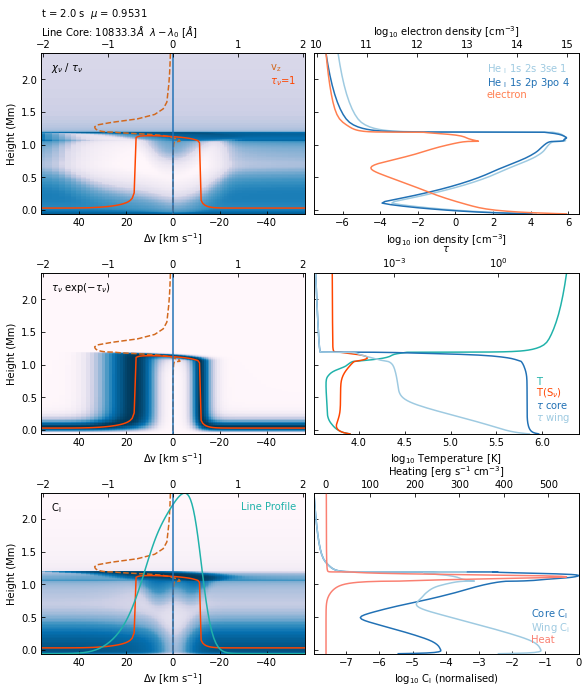

In [5]:
##
## Calculate formation properties
## Extract:
# for i in range(0,len(times2plot)):
for i in range(20,21):
    
    tind = np.abs(cdf1.time - times2plot[i]).argmin()    
    cf = rp.contrib_fn(cdf1,kr_9lev, tStep = tind, opctabPath = opctabfile, returnData=True)
  
  



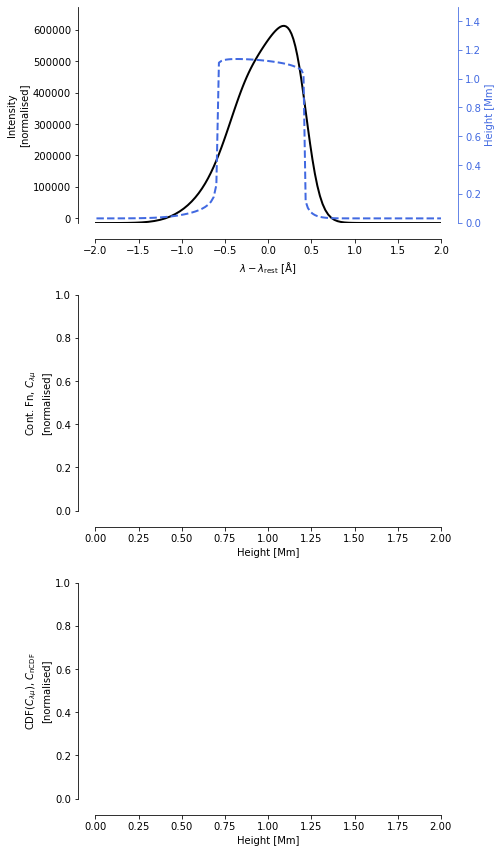

In [6]:
prof = LineProfiles.profile(cdf1, kr_9lev)
muind = 4
maxprof = np.nanmax(prof['line_int'][muind,0:prof['nq'],tind])/1e5
minprof = np.nanmin(prof['line_int'][muind,0:prof['nq'],tind])/1e5


savepng = False
savepdf = False

fname_out = 'QSHTSL_wHeCnt_He10830_PlasmaProps_process'


xtitle_A = '$\lambda - \lambda_{\mathrm{rest}}$ [$\mathrm{\AA}$]'
ytitle_A = 'Intensity\n[normalised]'
ytitle_A_2 = 'Height [Mm]'

xtitle_B = 'Height [Mm]'
ytitle_B = 'Cont. Fn, $C_{\lambda\mu}$\n[normalised]'


xtitle_C = 'Height [Mm]'
ytitle_C = 'CDF($C_{\lambda\mu}$), $C_{\mathrm{nCDF}}$\n[normalised]'


xsize = 6
ysize = 10

fig = plt.figure(figsize=(xsize, ysize))
x1 = 0.10
y1 = 0.10
dx = 0.8
dy = 0.3
sy = 0.1


xrange_A = [-2, 2]
xrange_B = [0, 2]
xrange_C = [0, 2]

yrange_A = [minprof*0.9,maxprof*1.1]
yrange_A_2 = [0, 1.5]


ax1 = fig.add_axes([x1, y1+2*dy+2*sy, dx, dy])
ax2 = fig.add_axes([x1, y1+1*dy+1*sy, dx, dy])
ax3 = fig.add_axes([x1, y1, dx, dy])

ax4 = ax1.twinx()
#ax3.set_xlim([0,13])



ax1.set_xlim(xrange_A[0],xrange_A[-1])
ax2.set_xlim(xrange_B[0],xrange_B[-1])
ax3.set_xlim(xrange_C[0],xrange_C[-1])

ax1.set_ylim(yrange_A[0],yrange_A[-1])
ax4.set_ylim(yrange_A_2[0],yrange_A_2[-1])


ax1.set_xlabel(xtitle_A)
ax1.set_ylabel(ytitle_A)
ax4.set_ylabel(ytitle_A_2)
ax2.set_xlabel(xtitle_B)
ax2.set_ylabel(ytitle_B)
ax3.set_xlabel(xtitle_C)
ax3.set_ylabel(ytitle_C)

ax1.spines['bottom'].set_visible(True)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(True)

ax2.spines['bottom'].set_visible(True)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(True)

ax3.spines['bottom'].set_visible(True)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(True)

ax4.spines['bottom'].set_visible(False)
ax4.spines["right"].set_position(("axes",1.05))
ax4.spines['left'].set_visible(False)
ax4.spines['right'].set_visible(True)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_color('royalblue')
ax4.tick_params(axis='x', colors='royalblue', which = 'both')
ax4.tick_params(axis='y', colors='royalblue', which = 'both')
ax4.yaxis.label.set_color('royalblue')
ax4.xaxis.label.set_color('royalblue')
ax4.title.set_color('')  


ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 
ax2.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 
ax3.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["bottom"].set_position(("axes",-.075))
ax1.spines["left"].set_position(("axes",-.05))
ax2.spines["bottom"].set_position(("axes",-.075))
ax2.spines["left"].set_position(("axes",-.05))
ax3.spines["bottom"].set_position(("axes",-.075))
ax3.spines["left"].set_position(("axes",-.05))

# line1, = ax1.plot(cf['wavelength']-cdf1.alamb[kr_9lev], 
#                   cf['lineProfile']/np.nanmax(cf['lineProfile']),
#                    linewidth = 2, linestyle = '-', color = 'black', 
#                    label = 'Line Profile'
#                  )
line1, = ax1.plot(prof['wavelength']-prof['rest_wave'], 
                  prof['line_int'][muind,0:prof['nq'],tind]/1e5,
                   linewidth = 2, linestyle = '-', color = 'black', 
                   label = 'Line Profile'
                 )



line2, = ax4.plot(cf['wavelength']-cdf1.alamb[kr_9lev], 
                  cf['tau1'],
                   linewidth = 2, linestyle = '--', color = 'royalblue', 
                   label = 'Line Profile'
                 )

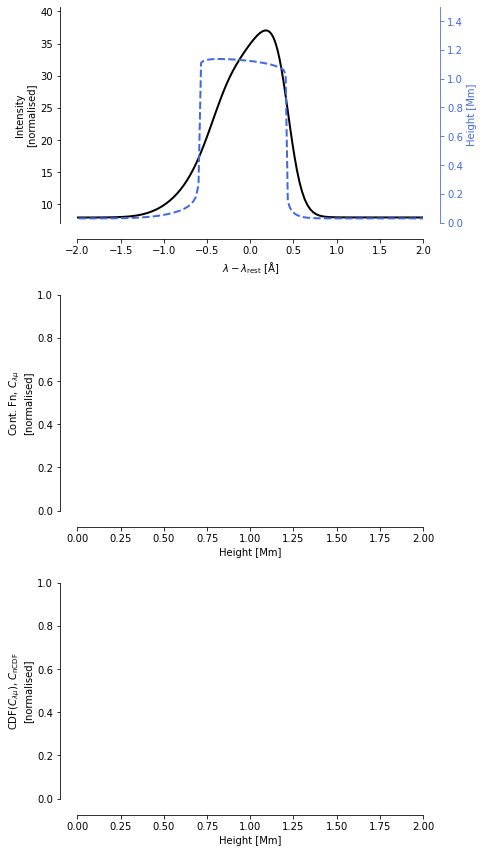

In [7]:
##
## Plot an example Contribution fn 
##

## (A) = normalised line profile with tau 1 surface overlaid
## (B) = normalised contribution function 
## (C) = normalised CDF of CN

## on panel A show horizontal lines of zupp and zlow
## on panel B show vertical lines of zupp and zlow, and horizontal lines of 0.1, 0.9
## on panel B show vertical lines of zupp and zlow, and horizontal lines of 0.1, 0.9

cdf1 = radynpy.cdf.RadynData(filen+'.cdf', varList = '*')
prof = LineProfiles.profile(cdf1, kr_9lev)
muind = 4
maxprof = np.nanmax(prof['line_int'][muind,0:prof['nq'],tind])/1e5
minprof = np.nanmin(prof['line_int'][muind,0:prof['nq'],tind])/1e5


savepng = False
savepdf = False

fname_out = 'QSHTSL_wHeCnt_He10830_PlasmaProps_process'


xtitle_A = '$\lambda - \lambda_{\mathrm{rest}}$ [$\mathrm{\AA}$]'
ytitle_A = 'Intensity\n[normalised]'
ytitle_A_2 = 'Height [Mm]'

xtitle_B = 'Height [Mm]'
ytitle_B = 'Cont. Fn, $C_{\lambda\mu}$\n[normalised]'


xtitle_C = 'Height [Mm]'
ytitle_C = 'CDF($C_{\lambda\mu}$), $C_{\mathrm{nCDF}}$\n[normalised]'


xsize = 6
ysize = 10

fig = plt.figure(figsize=(xsize, ysize))
x1 = 0.10
y1 = 0.10
dx = 0.8
dy = 0.3
sy = 0.1


xrange_A = [-2, 2]
xrange_B = [0, 2]
xrange_C = [0, 2]

yrange_A = [minprof*0.9,maxprof*1.1]
yrange_A_2 = [0, 1.5]


ax1 = fig.add_axes([x1, y1+2*dy+2*sy, dx, dy])
ax2 = fig.add_axes([x1, y1+1*dy+1*sy, dx, dy])
ax3 = fig.add_axes([x1, y1, dx, dy])

ax4 = ax1.twinx()
#ax3.set_xlim([0,13])



ax1.set_xlim(xrange_A[0],xrange_A[-1])
ax2.set_xlim(xrange_B[0],xrange_B[-1])
ax3.set_xlim(xrange_C[0],xrange_C[-1])

ax1.set_ylim(yrange_A[0],yrange_A[-1])
ax4.set_ylim(yrange_A_2[0],yrange_A_2[-1])


ax1.set_xlabel(xtitle_A)
ax1.set_ylabel(ytitle_A)
ax4.set_ylabel(ytitle_A_2)
ax2.set_xlabel(xtitle_B)
ax2.set_ylabel(ytitle_B)
ax3.set_xlabel(xtitle_C)
ax3.set_ylabel(ytitle_C)

ax1.spines['bottom'].set_visible(True)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(True)

ax2.spines['bottom'].set_visible(True)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(True)

ax3.spines['bottom'].set_visible(True)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(True)

ax4.spines['bottom'].set_visible(False)
ax4.spines["right"].set_position(("axes",1.05))
ax4.spines['left'].set_visible(False)
ax4.spines['right'].set_visible(True)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_color('royalblue')
ax4.tick_params(axis='x', colors='royalblue', which = 'both')
ax4.tick_params(axis='y', colors='royalblue', which = 'both')
ax4.yaxis.label.set_color('royalblue')
ax4.xaxis.label.set_color('royalblue')
ax4.title.set_color('')  


ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 
ax2.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 
ax3.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["bottom"].set_position(("axes",-.075))
ax1.spines["left"].set_position(("axes",-.05))
ax2.spines["bottom"].set_position(("axes",-.075))
ax2.spines["left"].set_position(("axes",-.05))
ax3.spines["bottom"].set_position(("axes",-.075))
ax3.spines["left"].set_position(("axes",-.05))

# line1, = ax1.plot(cf['wavelength']-cdf1.alamb[kr_9lev], 
#                   cf['lineProfile']/np.nanmax(cf['lineProfile']),
#                    linewidth = 2, linestyle = '-', color = 'black', 
#                    label = 'Line Profile'
#                  )
line1, = ax1.plot(prof['wavelength']-prof['rest_wave'], 
                  prof['line_int'][muind,0:prof['nq'],tind]/1e5,
                   linewidth = 2, linestyle = '-', color = 'black', 
                   label = 'Line Profile'
                 )



line2, = ax4.plot(cf['wavelength']-cdf1.alamb[kr_9lev], 
                  cf['tau1'],
                   linewidth = 2, linestyle = '--', color = 'royalblue', 
                   label = 'Line Profile'
                 )



In [ ]:
##
## Calculate the lightcurves
##

cdf1 = radynpy.cdf.RadynData(filen+'.cdf', varList = '*')


## integrate over this wavelength range
w1_9lev = 10831.25
w2_9lev = 10835.25

## integrate over full time range, so t1 = t2 = 0
t1 = 0
t2 = 0

muind = 4

lcurve = LineProfiles.lcurve(cdf1, kr_9lev, w1 = w1_9lev, w2 = w2_9lev)
lcurve_t0 = LineProfiles.lcurve(cdf1_t0, kr_9lev , w1 = w1_9lev, w2 = w2_9lev)

lcurve_int = lcurve['lcurve_int'][muind]
lcurve_int_t0 = lcurve_t0['lcurve_int'][muind][0]

lcurve_9lev_excess = lcurve_int - lcurve_int_t0

contrast = (lcurve_int - lcurve_int_t0)/lcurve_int_t0 * 100

tindsel = np.zeros(501, dtype = int)
for i in range(len(tindsel)):
    tindsel[i] = (np.where(cdf1.time == times2plot[i]))[0]
    
contrast = contrast[tindsel]

In [ ]:
##
## Save the Data
##

formvars = {'contrast':contrast,
            'tindsel':tindsel,
            'lcurve_int':lcurve_int,
            'lcurve_int_t0':lcurve_int_t0,
            'times':times,
            'times2plot':times2plot,
            'uppzt':uppzt,
            'lowzt':lowzt,
            'tgav':tgav,
            'neav':neav,
            'w1_9lev':w1_9lev,
            'w2_9lev':w2_9lev}
           
fileout = filen+'_formvars.pkl'
with open(fileout, 'wb') as config_dictionary_file:
    pickle.dump(formvars, config_dictionary_file)

In [ ]:
##
## Load the data to plot
##
file_res = 'QSHTSL_1F09_d5_ec20_t10s_formvars.pkl'
with open(file_res, 'rb') as config_dictionary_file:
    formvars_1 = pickle.load(config_dictionary_file)
file_res = 'QSHTSL_5F09_d5_ec20_t10s_formvars.pkl'
with open(file_res, 'rb') as config_dictionary_file:
    formvars_2 = pickle.load(config_dictionary_file)
file_res = 'QSHTSL_1F10_d5_ec20_t10s_formvars.pkl'
with open(file_res, 'rb') as config_dictionary_file:
    formvars_3 = pickle.load(config_dictionary_file)
file_res = 'QSHTSL_5F10_d5_ec20_t10s_formvars.pkl'
with open(file_res, 'rb') as config_dictionary_file:
    formvars_4 = pickle.load(config_dictionary_file)
file_res = 'QSHTSL_1F11_d5_ec20_t10s_formvars.pkl'
with open(file_res, 'rb') as config_dictionary_file:
    formvars_5 = pickle.load(config_dictionary_file)

file_res = 'QSHTSL_1F09_d5_ec20_triangle_20s_formvars.pkl'
with open(file_res, 'rb') as config_dictionary_file:
    formvars_6 = pickle.load(config_dictionary_file)
file_res = 'QSHTSL_5F09_d5_ec20_triangle_20s_formvars.pkl'
with open(file_res, 'rb') as config_dictionary_file:
    formvars_7 = pickle.load(config_dictionary_file)
file_res = 'QSHTSL_1F10_d5_ec20_triangle_20s_formvars.pkl'
with open(file_res, 'rb') as config_dictionary_file:
    formvars_8 = pickle.load(config_dictionary_file)
file_res = 'QSHTSL_5F10_d5_ec20_triangle_20s_formvars.pkl'
with open(file_res, 'rb') as config_dictionary_file:
    formvars_9 = pickle.load(config_dictionary_file)
file_res = 'QSHTSL_1F11_d5_ec20_triangle_20s_formvars.pkl'
with open(file_res, 'rb') as config_dictionary_file:
    formvars_10 = pickle.load(config_dictionary_file)







In [ ]:
##
## Load the data to plot
##
# file_res = 'QSHTSL_1F09_d5_ec20_triangle_20s_formvars.pkl'
# with open(file_res, 'rb') as config_dictionary_file:
#     formvars_1 = pickle.load(config_dictionary_file)
# file_res = 'QSHTSL_5F09_d5_ec20_triangle_20s_formvars.pkl'
# with open(file_res, 'rb') as config_dictionary_file:
#     formvars_2 = pickle.load(config_dictionary_file)
# file_res = 'QSHTSL_1F10_d5_ec20_triangle_20s_formvars.pkl'
# with open(file_res, 'rb') as config_dictionary_file:
#     formvars_3 = pickle.load(config_dictionary_file)
# file_res = 'QSHTSL_5F10_d5_ec20_triangle_20s_formvars.pkl'
# with open(file_res, 'rb') as config_dictionary_file:
#     formvars_4 = pickle.load(config_dictionary_file)
# file_res = 'QSHTSL_1F11_d5_ec20_triangle_20s_formvars.pkl'
# with open(file_res, 'rb') as config_dictionary_file:
#     formvars_5 = pickle.load(config_dictionary_file)





In [ ]:
##
## Group the results to plot
##

# neav_all = np.concatenate([formvars_1['neav'][0:201], 
#                            formvars_2['neav'][0:201],
#                            formvars_3['neav'][0:201],
#                            formvars_4['neav'][0:201],
#                            formvars_5['neav'][0:201]
#                           ])
# tgav_all = np.concatenate([formvars_1['tgav'][0:201], 
#                            formvars_2['tgav'][0:201],
#                            formvars_3['tgav'][0:201],
#                            formvars_4['tgav'][0:201],
#                            formvars_5['tgav'][0:201]
#                           ])
# contrast_all = np.concatenate([formvars_1['contrast'][0:201],
#                                formvars_2['contrast'][0:201],
#                                formvars_3['contrast'][0:201],
#                                formvars_4['contrast'][0:201],
#                                formvars_5['contrast'][0:201]
#                               ])




In [ ]:
##
## Group the results to plot
##

neav_all = np.concatenate([formvars_1['neav'][0:101], 
                           formvars_2['neav'][0:101],
                           formvars_3['neav'][0:101],
                           formvars_4['neav'][0:101],
                           formvars_5['neav'][0:101],
                           formvars_6['neav'][0:201],
                           formvars_7['neav'][0:201],
                           formvars_8['neav'][0:201],
                           formvars_9['neav'][0:201],
                           formvars_10['neav'][0:201]
                          ])

tgav_all = np.concatenate([formvars_1['tgav'][0:101], 
                           formvars_2['tgav'][0:101],
                           formvars_3['tgav'][0:101],
                           formvars_4['tgav'][0:101],
                           formvars_5['tgav'][0:101],
                           formvars_6['tgav'][0:201],
                           formvars_7['tgav'][0:201],
                           formvars_8['tgav'][0:201],
                           formvars_9['tgav'][0:201],
                           formvars_10['tgav'][0:201]
                          ])

contrast_all = np.concatenate([formvars_1['contrast'][0:101], 
                            formvars_2['contrast'][0:101],
                            formvars_3['contrast'][0:101],
                            formvars_4['contrast'][0:101],
                            formvars_5['contrast'][0:101],
                            formvars_6['contrast'][0:201],
                            formvars_7['contrast'][0:201],
                            formvars_8['contrast'][0:201],
                            formvars_9['contrast'][0:201],
                            formvars_10['contrast'][0:201]
                            ])




In [ ]:
##
## Plot properties 
##

#Avenir LT Std
font = {'family': 'Avenir LT Std',
        'color':  'black',
        'weight': 'medium',
        'size': 20,
        }
plot_params = {'ytick.direction': 'in', 
               'xtick.direction': 'in', 
               'xtick.minor.visible': True,
               'ytick.minor.visible': True,
               'xtick.major.size': 10, 'xtick.minor.size': 5,
               'ytick.major.size': 10, 'ytick.minor.size': 5,
               'ytick.right': True,
               'xtick.top': True,
               'ytick.major.width': 1.5,
               'xtick.major.width': 1.5,
               'ytick.minor.width': 1.5,
               'xtick.minor.width': 1.5,
               'axes.linewidth': 1.5,
               'axes.spines.top': True,
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.titlepad' : 18 }

plot_lg_params = {'legend.frameon': False}
#plt.rcParams.update({'font.size': font['size'], 'font.family':font['family'], 'font.weight':font['weight'], 'font.color':font['color']})

plt.rcParams.update({'font.size':font['size'], 'font.family':font['family'], 'font.weight':font['weight']})
plt.rcParams.update({'ytick.direction': plot_params['ytick.direction'],
                     'xtick.direction': plot_params['xtick.direction'],
                     'xtick.minor.visible': plot_params['xtick.minor.visible'],
                     'ytick.minor.visible': plot_params['ytick.minor.visible'],
                     'ytick.major.size':  plot_params['ytick.major.size'], 
                     'ytick.minor.size':  plot_params['ytick.minor.size'],
                     'xtick.major.size':  plot_params['xtick.major.size'],                                
                     'xtick.minor.size':  plot_params['xtick.minor.size'],
                     'ytick.right': plot_params['ytick.right'],
                     'xtick.top': plot_params['xtick.top'],
                     'ytick.major.width': plot_params['ytick.major.width'],
                     'xtick.major.width': plot_params['xtick.major.width'],
                     'ytick.minor.width': plot_params['ytick.minor.width'],
                     'xtick.minor.width': plot_params['xtick.minor.width'],                    
                     'axes.linewidth': plot_params['axes.linewidth'],
                     'axes.spines.top' : plot_params['axes.spines.top'],
                     'axes.spines.bottom' : plot_params['axes.spines.bottom'],
                     'axes.spines.left' : plot_params['axes.spines.left'],
                     'axes.spines.right' : plot_params['axes.spines.right'],
                     'axes.titlepad' : plot_params['axes.titlepad'],
                    })

plt.rcParams.update({'legend.frameon': plot_lg_params['legend.frameon']})

mpl.mathtext.SHRINK_FACTOR = 0.6
mpl.mathtext.GROW_FACTOR = 1 / 0.6

In [ ]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [ ]:
##
## Plot the results
##
savepng = True
savepdf = True

fname_out = 'QSHTSL_wHeCnt_He10830_PlasmaProps'

minColorp = 0.10
maxColorp = 1.00
cmappos = truncate_colormap(cmocean.cm.haline, minColorp, maxColorp)

minColorn = 0.0
maxColorn = 0.70
cmapneg = truncate_colormap(cmocean.cm.amp, minColorn, maxColorn)


contrast_range = [-15, 150]
yrange = [10,45]
xrange = [1,15]
yrange_in = [15,25]
xrange_in = [1.0,2.0]
nescale = 1e12
tescale = 1e3

xtitle = 'Electron Density x10$^{12}$ [cm$^{-3}$]'
ytitle = 'Temperature [kK]'

xsize = 10
ysize = 

fig = plt.figure(figsize=(xsize, ysize))
x1 = 0.10
y1 = 0.10
dx = 0.8
dy = 0.8

ax1 = fig.add_axes([x1, y1, dx, dy])
ax2 = fig.add_axes([0.3, 0.1, 0.5, 0.175])

ax2.tick_params(labelsize=15)

ax1.set_ylim(yrange[0],yrange[1])
ax1.set_xlim(xrange[0],xrange[1])
ax2.set_ylim(yrange_in[0],yrange_in[1])
ax2.set_xlim(xrange_in[0],xrange_in[1])
ax1.set_xlabel(xtitle)
ax1.set_ylabel(ytitle)

ax1.set_yscale('linear')
ax1.set_xscale('linear')
#     ax1.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
# ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
# for label in ax1.yaxis.get_ticklabels()[::2]:
#     label.set_visible(False) #(3)

ax1.spines['bottom'].set_visible(True)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(True)
# ax2.spines['bottom'].set_visible(True)
# ax2.spines['top'].set_visible(False)
# ax2.spines['right'].set_visible(False)
# ax2.spines['left'].set_visible(True)


ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 
# ax2.tick_params(
#     axis='both',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=True,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=True,
#     labeltop = False,
#     left=True,      # ticks along the bottom edge are off
#     right=False,         # ticks along the top edge are off
#     labelright=False,
#     labelleft = True
#     ) 

ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.35, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.35, color = 'grey', alpha = 0.25)
    
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.spines["left"].set_position(("axes",-.05))

pinds = (np.where(contrast_all >= 0))[0]
ninds = (np.where(contrast_all <= 0))[0]
sc1 = ax1.scatter(neav_all[pinds]/nescale,tgav_all[pinds]/tescale, alpha = 1.0, 
                 s=150,
                 c=contrast_all[pinds],
                 cmap=cmappos,
                 edgecolor='white',
                 linewidths=.5,
                 vmin=0,vmax=contrast_range[1])
sc2 = ax1.scatter(neav_all[ninds]/nescale,tgav_all[ninds]/tescale, alpha = 1.0, 
#                  s=np.exp(times[ninds]),  
                 s = 150,
                 c=contrast_all[ninds],
                 cmap=cmapneg,
                 edgecolor='white',
                 linewidths=.5,
                 vmin=contrast_range[0],vmax=0)

sc3 = ax2.scatter(neav_all[pinds]/nescale,tgav_all[pinds]/tescale, alpha = 1.0, 
                 s=50,
                 c=contrast_all[pinds],
                 cmap=cmappos,
                 edgecolor='white',
                 linewidths=.5,
                 vmin=0,vmax=contrast_range[1])
sc4 = ax2.scatter(neav_all[ninds]/nescale,tgav_all[ninds]/tescale, alpha = 1.0, 
#                  s=np.exp(times[ninds]),  
                 s = 50,
                 c=contrast_all[ninds],
                 cmap=cmapneg,
                 edgecolor='white',
                 linewidths=.5,
                 vmin=contrast_range[0],vmax=0)


cbar_ax = fig.add_axes([x1+dx+0.05, 0.5, 0.025, 0.4])
norm = mpl.colors.Normalize(vmax=contrast_range[1], vmin=0)
cb1 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmappos,
                          norm=norm,
                          #ticks = [0, 1e5],
                          extend='max',
                          orientation='vertical')
cbar_ax.yaxis.set_ticks_position('right')
cbar_ax.yaxis.set_label_position('right')
cb1.set_label('Positive Contrast [%]', fontdict=font)
tick_locator = ticker.MaxNLocator(nbins=5)
cb1.locator = tick_locator
cb1.update_ticks()

cbar_ax2 = fig.add_axes([x1+dx+0.05, 0.05, 0.025, 0.4])
norm2 = mpl.colors.Normalize(vmax=0, vmin=contrast_range[0])
cb2 = mpl.colorbar.ColorbarBase(cbar_ax2, cmap=cmapneg,
                          norm=norm2,
                          #ticks = [0, 1e5],
                          extend='min',
                          orientation='vertical')
cbar_ax2.yaxis.set_ticks_position('right')
cbar_ax2.yaxis.set_label_position('right')
cb2.set_label('Negative Contrast [%]', fontdict=font)
tick_locator = ticker.MaxNLocator(nbins=5)
cb2.locator = tick_locator
cb2.update_ticks()

ax1.text(0.6, 0.850, 'He I 10830$\mathrm{\AA}$\nPlasma properties\nat <Z$_\mathrm{form}}$>',
              color = 'black',transform=ax1.transAxes,fontdict=font,fontsize=20)        



if savepng == True:
        plt.savefig(dir1+fname_out+'_FormProps.png', format='png', bbox_inches = 'tight', dpi=400)
if savepdf == True:
        plt.savefig(dir1+fname_out+'_FormProps.pdf', format='pdf', bbox_inches = 'tight', dpi=400)


plt.show()

In [ ]:
# ##
# ## Plot the results
# ##
# savepng = False
# savepdf = False


# minColorp = 0.10
# maxColorp = 1.00
# cmappos = truncate_colormap(cmocean.cm.haline, minColorp, maxColorp)

# minColorn = 0.0
# maxColorn = 0.70
# cmapneg = truncate_colormap(cmocean.cm.amp, minColorn, maxColorn)


# contrast_range = [-15, 120]
# yrange = [10,35]
# xrange = [1,7]
# nescale = 1e12
# tescale = 1e3

# xtitle = 'Electron Density x10$^{12}$ [cm$^{-3}$]'
# ytitle = 'Temperature [kK]'

# xsize = 8
# ysize = 8

# fig = plt.figure(figsize=(xsize, ysize))
# x1 = 0.10
# y1 = 0.10
# dx = 0.8
# dy = 0.8

# ax1 = fig.add_axes([x1, y1, dx, dy])

# ax1.set_ylim(yrange[0],yrange[1])
# ax1.set_xlim(xrange[0],xrange[1])
# ax1.set_xlabel(xtitle)
# ax1.set_ylabel(ytitle)

# ax1.set_yscale('linear')
# ax1.set_xscale('linear')
# #     ax1.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
# # ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
# # for label in ax1.yaxis.get_ticklabels()[::2]:
# #     label.set_visible(False) #(3)

# ax1.spines['bottom'].set_visible(True)
# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)
# ax1.spines['left'].set_visible(True)

# ax1.tick_params(
#     axis='both',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=True,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=True,
#     labeltop = False,
#     left=True,      # ticks along the bottom edge are off
#     right=False,         # ticks along the top edge are off
#     labelright=False,
#     labelleft = True
#     ) 

# ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.35, color = 'grey', alpha = 0.25)
# ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.35, color = 'grey', alpha = 0.25)
    
# ax1.spines["bottom"].set_position(("axes",-.075))
# ax1.spines["left"].set_position(("axes",-.05))

# pinds = (np.where(contrast[0:101] >= 0))[0]
# ninds = (np.where(contrast[0:101] <= 0))[0]
# sc = ax1.scatter(neav[pinds]/nescale,tgav[pinds]/tescale, alpha = 1.0, 
#                  s=150,
#                  c=contrast[pinds],
#                  cmap=cmappos,
#                  edgecolor='white',
#                  linewidths=1.5,
#                  vmin=0,vmax=contrast_range[1])
# sc1 = ax1.scatter(neav[ninds]/nescale,tgav[ninds]/tescale, alpha = 1, 
# #                  s=np.exp(times[ninds]),  
#                  s = 150,
#                  c=contrast[ninds],
#                  cmap=cmapneg,
#                  edgecolor='white',
#                  linewidths=1.5,
#                  vmin=contrast_range[0],vmax=0)




# cbar_ax = fig.add_axes([x1+dx+0.05, 0.5, 0.025, 0.4])
# norm = mpl.colors.Normalize(vmax=contrast_range[1], vmin=0)
# cb1 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmappos,
#                           norm=norm,
#                           #ticks = [0, 1e5],
#                           extend='max',
#                           orientation='vertical')
# cbar_ax.yaxis.set_ticks_position('right')
# cbar_ax.yaxis.set_label_position('right')
# cb1.set_label('\nPositive Contrast [%]', fontdict=font)
# tick_locator = ticker.MaxNLocator(nbins=5)
# cb1.locator = tick_locator
# cb1.update_ticks()

# cbar_ax2 = fig.add_axes([x1+dx+0.05, 0.05, 0.025, 0.4])
# norm2 = mpl.colors.Normalize(vmax=0, vmin=contrast_range[0])
# cb2 = mpl.colorbar.ColorbarBase(cbar_ax2, cmap=cmapneg,
#                           norm=norm2,
#                           #ticks = [0, 1e5],
#                           extend='min',
#                           orientation='vertical')
# cbar_ax2.yaxis.set_ticks_position('right')
# cbar_ax2.yaxis.set_label_position('right')
# cb2.set_label('Negative Contrast [%]', fontdict=font)
# tick_locator = ticker.MaxNLocator(nbins=5)
# cb2.locator = tick_locator
# cb2.update_ticks()



# if savepng == True:
#         plt.savefig(dir1+fname_out+'_FormProps.png', format='png', bbox_inches = 'tight', dpi=400)

# plt.show()

In [ ]:
cdf1.ne1[tind,zind1:zind2]

In [ ]:
lowz

In [ ]:
plt.plot(cf['wavelength']-cdf1.alamb[28], cf['lineProfile'])
plt.axvline(x=centroidwave-cdf1.alamb[28], linestyle = '--', color = 'red')
plt.plot(cf['wavelength']-cdf1.alamb[28], cf['tau1'])




In [ ]:
cf.keys()

In [ ]:
normcf = cf['contFn'][centroidind,:]/np.nanmax(cf['contFn'][centroidind,:])

In [ ]:
contfncdf = np.cumsum(normcf)
contfncdf/=np.nanmax(contfncdf)

In [ ]:
plt.plot((cf['y'][cf['iwy']]), (1-contfncdf))
# plt.axvline(x=t1max, color = 'red')
plt.axhline(y=0.1, color = 'green')
plt.axhline(y=0.90, color = 'green')
plt.axvline(x=1.18, color = 'black', linestyle = '--')
plt.axvline(x=1.145, color = 'black', linestyle = '--')
plt.xlim(0.,1.5)





In [ ]:
print(np.abs((1-contfncdf) - 0.9).argmin())
print(np.abs((1-contfncdf) - 0.1).argmin())

In [ ]:
print((cf['y'][cf['iwy']][41]))
print((cf['y'][cf['iwy']][62]))

In [ ]:
plt.plot(cdf1.z1[20,:]/1e8, cdf1.tg1[20,:])
plt.yscale('linear')
plt.xlim(0,1.5)
# plt.axvline(x=1.107, color = 'black', linestyle = '--')
plt.axvline(x=uppz, color = 'red', linestyle = '--')
plt.axvline(x=lowz, color = 'red', linestyle = '--')
plt.axhline(y=tgav, color = 'black', linestyle = ':')
plt.xlim(1.1, 1.25)
plt.ylim(4000,40000)

In [ ]:
plt.plot(cdf1.z1[20,:]/1e8, cdf1.ne1[20,:])
plt.yscale('log')
plt.xlim(0,1.5)
# plt.axvline(x=1.107, color = 'black', linestyle = '--')
plt.axvline(x=uppz, color = 'red', linestyle = '--')
plt.axvline(x=lowz, color = 'red', linestyle = '--')
plt.axhline(y=neav, color = 'black', linestyle = ':')
plt.xlim(1.1, 1.25)
# plt.ylim(4000,40000)